In [1]:
import pandas as pd
import numpy as np

## Import Dataset

In [2]:
data = pd.read_csv('MM_Copy.csv')

#### Evaluate Imported Data

In [3]:
#print(data.shape)
#data.info()
n = len(pd.unique(data['User']))
print(n)
#I'm glad I used this method because 26,945 users is too many to visualize.

26945


In [4]:
n1 = data.nunique(axis=0)
print(n1)

User                     26945
Location                  8678
Tweet                    52769
Num of Friend             4762
Num of Followers          6321
Total Tweets by user     17341
Account Created at       26943
Tweet Created at         43365
Num of Retweet             286
hashtags in the tweet    19641
dtype: int64


In [5]:
print('Unique Occurances:')
print(n1[:2])

Unique Occurances:
User        26945
Location     8678
dtype: int64


## Clean and Evaluate Data

#### Create Variables

In [22]:
#Prepare to import libraries; preprocessor is an outstanding problem

!pip install textblob

  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)


In [6]:
#Import liberaries
import re
import json
import pandas as pd
import csv
import re
import textblob
from textblob import TextBlob
import string
#import preprocessor as p   Feel like I'm going to need this later
import os
import time
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from PIL import Image

In [7]:
#Function to seek out @users in a tweet:
def mentioned_users(string):
    usernames = re.findall('@[^\]+', string)
    return usernames

    #data['mentioned_users'] = data['Tweet'].apply(lambda x: mentioned_users(x))
#I've defined the function, but I haven't used it yet...fine
data.head(10)

,User,Location,Tweet,Num of Friend,Num of Followers,Total Tweets by user,Account Created at,Tweet Created at,Num of Retweet,hashtags in the tweet
0,LordHthegreatH1,nice place on Earth,@RoyalFamily @ClarenceHouse @KensingtonRoyal\n...,51,36,1407,2020-09-30 10:31:14,2021-03-11 23:59:06,1,"[{'text': 'PrinceWilliam', 'indices': [90, 104]}]"
1,_memoRandom,NaN,"Listen to my latest podcast episode, entitled ...",46,47,9775,2014-11-01 16:34:21,2021-03-11 23:57:51,0,[]
2,PigSty96452169,NaN,#MeghanMarkle is salty AF 'cause her #moonbump...,125,122,4826,2020-06-22 20:11:14,2021-03-11 23:57:44,0,"[{'text': 'MeghanMarkle', 'indices': [0, 13]},..."
3,gofollie,"Pennsylvania, USA",#meghanmarkle didn’t know anything about the B...,172,99,2667,2020-07-03 12:31:14,2021-03-11 23:57:35,0,"[{'text': 'meghanmarkle', 'indices': [0, 13]},..."
4,UKEU360,"London, capital city of France",#RoyalFamily \n#MeghanandHarryonOprah \n#Oprah...,386,233,10771,2021-01-12 16:57:28,2021-03-11 23:56:36,0,"[{'text': 'RoyalFamily', 'indices': [0, 12]}, ..."
5,WhoSaidWhatOMG,United States/ United Kingdom,@SHODesusAndMero @Showtime #Oprah pursue #Dian...,833,733,3447,2009-03-24 23:07:00,2021-03-11 23:56:04,2,"[{'text': 'Oprah', 'indices': [27, 33]}, {'tex..."
6,RaySissum,The place where I belong.,A while ago I showed this pic of a young Megha...,120,45,548,2020-05-25 13:04:25,2021-03-11 23:53:22,0,[]
7,michael_hows,England,#PiersMorgan break #wind after #controversial ...,88,90,7660,2018-10-07 19:57:47,2021-03-11 23:53:15,0,"[{'text': 'PiersMorgan', 'indices': [0, 12]}, ..."
8,UKEU360,"London, capital city of France",#OprahMeghanHarry \n#MeghanMarkle \n#MeghanAnd...,386,233,10771,2021-01-12 16:57:28,2021-03-11 23:52:33,0,"[{'text': 'OprahMeghanHarry', 'indices': [0, 1..."
9,TheRealBlankly,Gutter 🇺🇸,@Beyonce @SandraRose @Oprah @OWNTV @tylerperry...,4,0,4,2021-03-11 23:15:45,2021-03-11 23:52:24,0,[]


#### Define Emojis

In [8]:
# Define Emoji_patterns
emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)



#Define the main function to clean text in various ways
def clean_text(text):
    text = re.sub('@[^\s]+', '', text)                                      #Remove surname
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', text)            #Remove all the URLs
    text = re.sub(r'#([^\s]+)', '', text)                                   #Remove hashtags entirely i.e. #hashtags
    text = emoji_pattern.sub(r'',text)                                      #Remove emojis if we have any
    text = text.lower()                                                     #lowercase the text 
    text = [word.strip(string.punctuation) for word in text.split(" ")]     #Tokenize text and remove punctuation 
    text = [word for word in text if not any (c.isdigit() for c in word)]   #Remove number
    text = [x for x in text if x not in set(stopwords.words('english'))]    #Remove stop words in English 
    text = [t for t in text if len(t) > 0]                                  #Remove empty tokens 
    text = [t for t in text if len(t) > 1]                                  #Remove words with only one letter 
    text = " ".join(text)                                                   #Join them all together  

    return(text)

In [9]:
#check the updated shape of the data

#Check the shape again the rest_index 
print(data.shape)
data.reset_index(inplace = True, drop= True)

#Check out data.tail() to validate index has been reset
data.tail()

(52820, 10)


,User,Location,Tweet,Num of Friend,Num of Followers,Total Tweets by user,Account Created at,Tweet Created at,Num of Retweet,hashtags in the tweet
52815,SoapOperaSpy,NaN,Royals News: Prince Harry And Meghan Markle Lo...,13120,21953,152338,2014-01-23 03:12:12,2021-03-04 14:49:45,0,"[{'text': 'PrinceHarry', 'indices': [87, 99]},..."
52816,C0C0AM,NaN,Well the public deserve to know #BuckinghamPal...,188,138,9823,2017-03-22 01:18:53,2021-03-04 14:49:14,0,"[{'text': 'BuckinghamPalace', 'indices': [32, ..."
52817,gofollie,"Pennsylvania, USA",@benshapiro #meghanmarkle is invading my priva...,173,99,2669,2020-07-03 12:31:14,2021-03-04 14:46:46,0,"[{'text': 'meghanmarkle', 'indices': [12, 25]}]"
52818,ParadeMagazine,NaN,Untangling the Provenance of #MeghanMarkle’s C...,1578,25327,37907,2009-01-06 16:29:00,2021-03-04 14:44:33,0,"[{'text': 'MeghanMarkle', 'indices': [29, 42]}]"
52819,keyblvds,NaN,#MeghanMarkle We are not buying what you're se...,2204,795,14315,2009-05-28 21:13:36,2021-03-04 14:43:59,0,"[{'text': 'MeghanMarkle', 'indices': [0, 13]}]"


In [ ]:
#I believe I need a column of the text, stripped of formatting, punctuation, hashtags
#@mentions, and other potential contents to run the sentiment analysis.

#### Clean the hashtags so they're useful 

In [10]:
#Import ast to convert a string representation of list to list 
#The column hashtags is affected 
import ast 

#Define a function to convert a string reps of list to list 
## Function should also handle NaN values after conversion 
def strlist_to_list(text):
    #Remove NaN
    if pd.isnull(text) == True: # if true 
        text = ''
    else: 
        text = ast.literal_eval(text)
    return text

# Apply strlist_to_list(...) to the column 'hashtags'
# Note that doing so will return a list of dictionaries, where there will be one dictionary for each hashtag in a single tweet.

data['hashtags in the tweet'] = data['hashtags in the tweet'].apply(lambda x: strlist_to_list(x))
data.head()

,User,Location,Tweet,Num of Friend,Num of Followers,Total Tweets by user,Account Created at,Tweet Created at,Num of Retweet,hashtags in the tweet
0,LordHthegreatH1,nice place on Earth,@RoyalFamily @ClarenceHouse @KensingtonRoyal\n...,51,36,1407,2020-09-30 10:31:14,2021-03-11 23:59:06,1,"[{'text': 'PrinceWilliam', 'indices': [90, 104]}]"
1,_memoRandom,NaN,"Listen to my latest podcast episode, entitled ...",46,47,9775,2014-11-01 16:34:21,2021-03-11 23:57:51,0,[]
2,PigSty96452169,NaN,#MeghanMarkle is salty AF 'cause her #moonbump...,125,122,4826,2020-06-22 20:11:14,2021-03-11 23:57:44,0,"[{'text': 'MeghanMarkle', 'indices': [0, 13]},..."
3,gofollie,"Pennsylvania, USA",#meghanmarkle didn’t know anything about the B...,172,99,2667,2020-07-03 12:31:14,2021-03-11 23:57:35,0,"[{'text': 'meghanmarkle', 'indices': [0, 13]},..."
4,UKEU360,"London, capital city of France",#RoyalFamily \n#MeghanandHarryonOprah \n#Oprah...,386,233,10771,2021-01-12 16:57:28,2021-03-11 23:56:36,0,"[{'text': 'RoyalFamily', 'indices': [0, 12]}, ..."


In [11]:
# Since each 'hashtag' contain a list of dictionaries, we need to loop through the list to extract the actual hashtags in the tweets.
# Define a function to perform this extraction:
def extract_hashtags(hashtag_list):
    # argument:
    # hashtag_list - a list of dictionary(ies), each containing a hashtag
    
    # Create a list to store the hashtags
    hashtags = []
    
    # Loop through the list:
    for i in range(0, len(hashtag_list)):
        # extract the hashtag value using the key - 'text'
        # For our purposes, we can ignore the indices, which tell us the position of the hashtags in the string of tweet
        # lowercase the text as well
        hashtags.append(hashtag_list[i]['text'].lower())
        
    return hashtags

In [12]:
# Apply function on the data['hashtags in the tweet'] and check the result 
data['hashtags in the tweet'] = data['hashtags in the tweet'].apply(lambda x: extract_hashtags(x))
print(data.head()['hashtags in the tweet'])

0                                      [princewilliam]
1                                                   []
2                             [meghanmarkle, moonbump]
3    [meghanmarkle, meghanmarkleisaliarandabully, m...
4    [royalfamily, meghanandharryonoprah, oprahmegh...
Name: hashtags in the tweet, dtype: object


#### Location

In [ ]:
#There are no blank locations in the code, so I think this process is done.
#I think, if that's the case, I'll simply have to drop cases that aren't recognized
#locations. They should be fairly unique, so if I'm limiting to 'top 5, 10, 20 it shouldn't
#be a problem; there shouldn't be many repeats with unique users.

In [ ]:
# Replace NaN values with n.a to let people know that users want to be annoynymous 
#Define the function to remove:
def remove_NaN(text):
    if pd.isnull(text) == True:
        text = 'n.a'
    else: 
        text = text.lower()            # lowercase data to handle easily
    return text

#Apply the function on data['Location'] and check the result 
data['Location'] = data['Location'].apply(lambda x: remove_NaN(x))
print(data.head()['Location'])

## Set up - Sentiment Anaysis (NLP)

In [13]:
#Importing VADER from NLTK - any reason for this package over others?
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Brie -
[nltk_data]     Work\AppData\Roaming\nltk_data...


True

In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a sid object called SentimentIntensity Analyzer()
sid = SentimentIntensityAnalyzer()


# Apply polarity_score method of SentimentIntensityAnalyzer()
data['sentiment'] = data ['Tweet'].apply(lambda x: sid.polarity_scores(x))


#Keep only the compound scores under the column 'Sentiment'
data = pd.concat([data.drop(['sentiment'], axis = 1), data['sentiment'].apply(pd.Series)], axis = 1)

In [17]:
# New Column: number of characters in 'Tweet'
data['Numchars'] = data['Tweet'].apply(lambda x: len(x))

# New Column: number of words in 'Tweet'
data['Numwords'] = data['Tweet'].apply(lambda x: len(x))

#Check the new columns:
data.tail(5)

,User,Location,Tweet,Num of Friend,Num of Followers,Total Tweets by user,Account Created at,Tweet Created at,Num of Retweet,hashtags in the tweet,neg,neu,pos,compound,Numchars,Numwords
52815,SoapOperaSpy,NaN,Royals News: Prince Harry And Meghan Markle Lo...,13120,21953,152338,2014-01-23 03:12:12,2021-03-04 14:49:45,0,"[princeharry, meghanmarkle]",0.139,0.722,0.139,0.0000,138,138
52816,C0C0AM,NaN,Well the public deserve to know #BuckinghamPal...,188,138,9823,2017-03-22 01:18:53,2021-03-04 14:49:14,0,"[buckinghampalace, meghanmarkle, princeandrew,...",0.000,0.821,0.179,0.3382,133,133
52817,gofollie,"Pennsylvania, USA",@benshapiro #meghanmarkle is invading my priva...,173,99,2669,2020-07-03 12:31:14,2021-03-04 14:46:46,0,[meghanmarkle],0.000,1.000,0.000,0.0000,64,64
52818,ParadeMagazine,NaN,Untangling the Provenance of #MeghanMarkle’s C...,1578,25327,37907,2009-01-06 16:29:00,2021-03-04 14:44:33,0,[meghanmarkle],0.118,0.724,0.158,0.1531,123,123
52819,keyblvds,NaN,#MeghanMarkle We are not buying what you're se...,2204,795,14315,2009-05-28 21:13:36,2021-03-04 14:43:59,0,[meghanmarkle],0.353,0.473,0.175,-0.5994,124,124


In [ ]:
#[52817] is almost perfectly neutral in this analysis, I think it's negative. I might be too close, making
#the analysis impartial and my judgment biased. This analysis might have a different benchmark for negative.

In [18]:
#Install genism package - document to vector

!pip install -U gensim

In [21]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(data["Tweet"].apply(lambda x: x.split(" ")))]

In [23]:

# Train a Doc2Vec model with our text data 
model = Doc2Vec(documents, vector_size = 10, window = 2, min_count = 1, workers =4)

#Transform each document into a vector data 
doc2vec_df = data["Tweet"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
data = pd.concat([data, doc2vec_df], axis = 1)

# Check out the newly added columns:
data.tail(2)

,User,Location,Tweet,Num of Friend,Num of Followers,Total Tweets by user,Account Created at,Tweet Created at,Num of Retweet,hashtags in the tweet,...,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4,doc2vec_vector_5,doc2vec_vector_6,doc2vec_vector_7,doc2vec_vector_8,doc2vec_vector_9
52818,ParadeMagazine,NaN,Untangling the Provenance of #MeghanMarkle’s C...,1578,25327,37907,2009-01-06 16:29:00,2021-03-04 14:44:33,0,[meghanmarkle],...,-0.135495,0.169187,0.198841,0.156591,0.098839,0.332925,0.379118,0.169404,-0.567565,0.097793
52819,keyblvds,NaN,#MeghanMarkle We are not buying what you're se...,2204,795,14315,2009-05-28 21:13:36,2021-03-04 14:43:59,0,[meghanmarkle],...,0.033056,-0.054038,0.092150,0.155100,-0.086900,0.016094,0.096005,0.121337,-0.274935,0.008652


#### Prepare text for analaysis and vizualization

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features = 100,                 # We only consider a maximum of 100 features 
    min_df = 10,                        # min_df:  the docucment frequency threshold for ignoring terms with a lower theshold 
    stop_words = 'english')             # stop_words: the words to be removed from the corpus. We will check for stopwords again

# Turn the "clean_Tweets" to the array 
tfidf_result = tfidf.fit_transform(data['Tweet']).toarray()


# Extract the frequencies and store them in the temporary dataframe 
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())

# Rename the column names and index
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = data.index

# Concatenate the two dataframes - 'dataset' and 'tfidf_df'
# Note: Axis = 1 -> add the 'tfidf_df' dataframe along the columns  or add these columns as columns in 'dataset'.
data = pd.concat([data, tfidf_df], axis = 1) 

# Check out
data.tail()

In [27]:
#data.tail() This shouldn't be here, but I don't feel like running again.

,User,Location,Tweet,Num of Friend,Num of Followers,Total Tweets by user,Account Created at,Tweet Created at,Num of Retweet,hashtags in the tweet,...,word_ve,word_want,word_watch,word_watching,word_way,word_white,word_woman,word_women,word_world,word_wow
52815,SoapOperaSpy,NaN,Royals News: Prince Harry And Meghan Markle Lo...,13120,21953,152338,2014-01-23 03:12:12,2021-03-04 14:49:45,0,"[princeharry, meghanmarkle]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52816,C0C0AM,NaN,Well the public deserve to know #BuckinghamPal...,188,138,9823,2017-03-22 01:18:53,2021-03-04 14:49:14,0,"[buckinghampalace, meghanmarkle, princeandrew,...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52817,gofollie,"Pennsylvania, USA",@benshapiro #meghanmarkle is invading my priva...,173,99,2669,2020-07-03 12:31:14,2021-03-04 14:46:46,0,[meghanmarkle],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52818,ParadeMagazine,NaN,Untangling the Provenance of #MeghanMarkle’s C...,1578,25327,37907,2009-01-06 16:29:00,2021-03-04 14:44:33,0,[meghanmarkle],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52819,keyblvds,NaN,#MeghanMarkle We are not buying what you're se...,2204,795,14315,2009-05-28 21:13:36,2021-03-04 14:43:59,0,[meghanmarkle],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
#Build the list of all the hashtags in the dataset 
hashtag_list = []

for i in range(0, len(data)): 
    #Obtain the current list of hashtags
    curr_hashtag = data.iloc[i,:]['hashtags in the tweet'] 
    
    #Extract and append the hashttags to "hashtag_list":
    for j in range(0, len(curr_hashtag)):
        hashtag_list.append(curr_hashtag[j])
        

#Print out the list 
print(hashtag_list)

['princewilliam', 'meghanmarkle', 'moonbump', 'meghanmarkle', 'meghanmarkleisaliarandabully', 'meghanmarklecansuckspotteddicks', 'royalfamily', 'meghanandharryonoprah', 'oprahmeghanharry', 'meghanmarkle', 'meghanandharry', 'oprah', 'dianaspencer', 'piersmorgan', 'wind', 'controversial', 'meghanmarkle', 'rant', 'oprahmeghanharry', 'meghanmarkle', 'meghanandharry', 'oprahmeghanharry', 'meghanmarkle', 'princeharry', 'abolishthemonarchy', 'meghanmarkle', 'iwm', 'princewilliam', 'meghanmarkle', 'princeharry', 'katemiddleton', 'princewilliam', 'harryandmeghanonoprah', 'meghanmarkle', 'meghanmarkle', 'mentalillness', 'whitesupremacy', 'antiracist', 'mentalhealth', 'meghanmarkle', 'katemiddleton', 'princewilliam', 'meghanmarkle', 'princeharry', 'katemiddleton', 'princewilliam', 'princewilliam', 'royalfamily', 'meghanmarkle', 'nftcollectors', 'princewilliam', 'meghanmarkle', 'princeharry', 'katemiddleton', 'princewilliam', 'meghanmarkle', 'meghanmarkle', 'notallmen', 'meghanmarkle', 'meghanandh

In [31]:
#No. of hashtags in the tweets we scraped:
print('In the {} tweets collected, there were {} hashtags.'.format(len(data), len (hashtag_list)))

In the 52820 tweets collected, there were 76568 hashtags.


In [30]:
#convert the hashtag data into a simple DataFrame to use in visualization

df_hashtag = pd.DataFrame({'hashtags': hashtag_list})

print(df_hashtag)

                           hashtags
0                     princewilliam
1                      meghanmarkle
2                          moonbump
3                      meghanmarkle
4      meghanmarkleisaliarandabully
...                             ...
76563                   princeharry
76564                meghanandharry
76565                  meghanmarkle
76566                  meghanmarkle
76567                  meghanmarkle

[76568 rows x 1 columns]


#### Visualization - Frequency Tables (hashtags)

                    hashtags  counts
2799            meghanmarkle   33125
3321        oprahmeghanharry    4301
2763          meghanandharry    3366
3615             princeharry    3160
2768   meghanandharryonoprah    3049
1853   harryandmeghanonoprah    2263
3476             piersmorgan    1269
3945             royalfamily    1257
3308                   oprah    1233
1849          harryandmeghan     888
2760                  meghan     773
3330            oprahwinfrey     494
2141  internationalwomensday     460
1843                   harry     454
3634           princessdiana     318
3773                  racism     315
2342           katemiddleton     280
648         buckinghampalace     276
1707                     gmb     236
3311        oprahharrymeghan     232


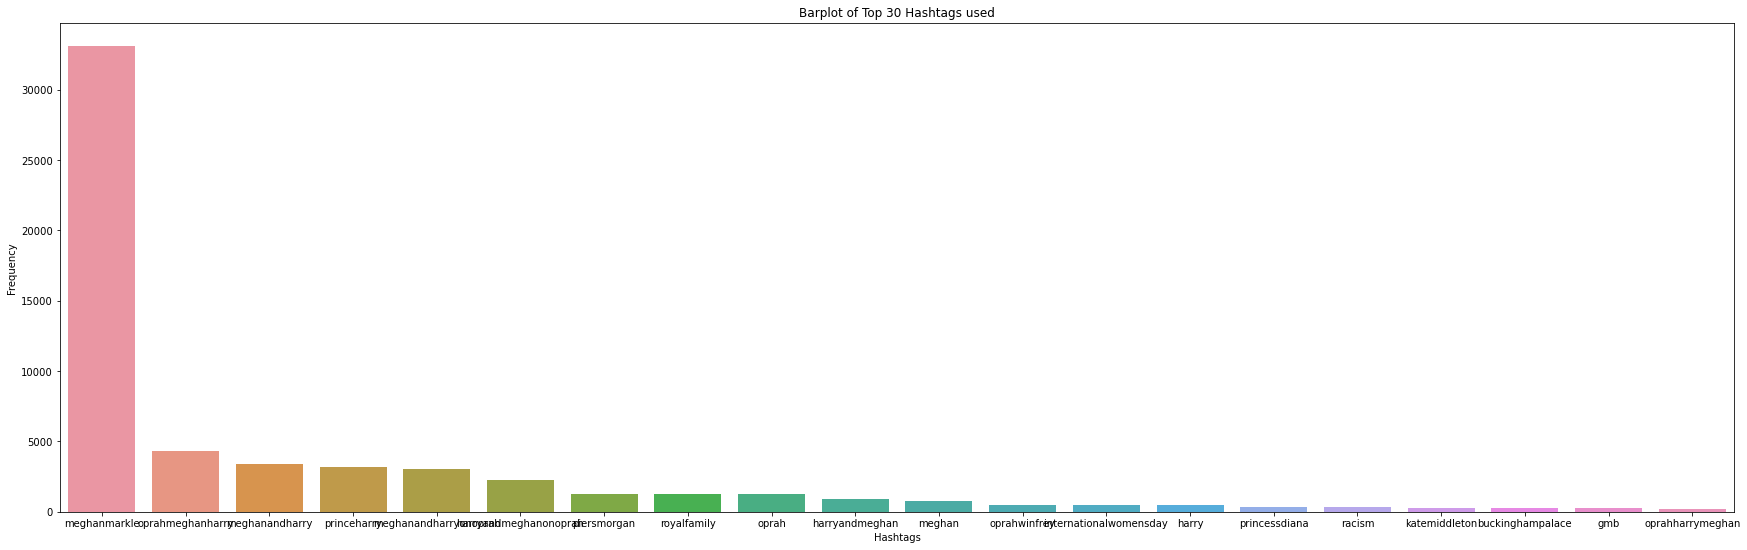

In [34]:
#Top 20 Hashtags 
top_hashtags = df_hashtag.groupby(['hashtags']).size().reset_index(name ='counts')    #Create another column to indicate the frequencies of a hashtags
top_hashtags = top_hashtags.sort_values(by = "counts", ascending = False)             #Sort the values by frequencies, ascedning orders  
print(top_hashtags.head(20))

#Countplot on the top 30 hashtags 
plt.figure(figsize=(30,9))
sns.set_palette('PuBuGn_d')
sns.barplot(x = 'hashtags', y = 'counts', data = top_hashtags.head(20))
plt.title('Top 30 Hashtag - count of occurances')
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#hashtags are interesting as a metric for engagement. I've seen 'stan' behavior where even if a tweet isn't directly about the subject of fan attention, devotees (called stans)
#will comment a hashtag of their fave's name, specifically to hack engagement metrics like the one created here. 'Get this/them to trend' is a common strategic behavior online. 
#It might be worthwhile to drop name-tags for this analysis. 

                    hashtags  counts
3321        oprahmeghanharry    4301
2763          meghanandharry    3366
3615             princeharry    3160
2768   meghanandharryonoprah    3049
1853   harryandmeghanonoprah    2263
3476             piersmorgan    1269
3945             royalfamily    1257
3308                   oprah    1233
1849          harryandmeghan     888
2760                  meghan     773
3330            oprahwinfrey     494
2141  internationalwomensday     460
1843                   harry     454
3634           princessdiana     318
3773                  racism     315
2342           katemiddleton     280
648         buckinghampalace     276
1707                     gmb     236
3311        oprahharrymeghan     232
2857                  megxit     224
3599            princeandrew     217
3730          queenelizabeth     213
3649           princewilliam     212
4583                thecrown     204
206                   archie     204
2744           meganandharry     202
1

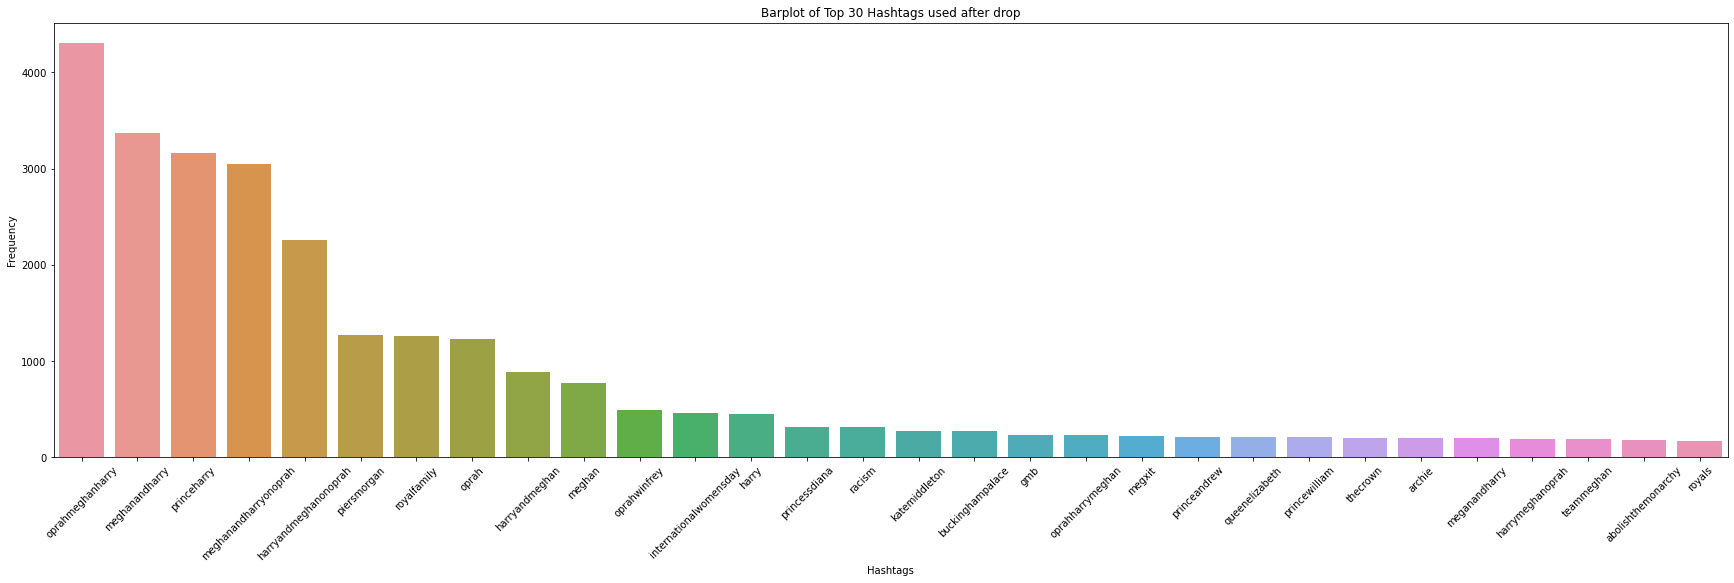

In [35]:
#Dropping the first row and take the next 30 - #meghanmarkle was used almost 8x more than the next highest tag...a very clear outlier.
# For analytical purposes, I think this helps illustrate the uneven attention MM recieves in this situation and why she (and by default H) take such a defensive
# posture, especially against legacy media organizations and social media platforms.  
#The INTENSITY of the attention (racist comments, monkey & banana emojis, "suggestions" that someone stab her pregnant stomach to proove she was faking her pregancy)
#combined with this magnitude, actually blew me away
top_hashtags_post_drop = top_hashtags[top_hashtags.counts <= 5000]
print(top_hashtags_post_drop.head(30))

#Countplot on the top 30 hashtags 
plt.figure(figsize=(30,8))
sns.set_palette('PuBuGn_d')
sns.barplot(x = 'hashtags', y = 'counts', data = (top_hashtags_post_drop.head(30)))
plt.title('Barplot of Top 30 Hashtags used after drop')
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)
plt.show()